In [1]:
import pandas as pd
### preseting MODNet path, remove this section later, just for manneback
import os
import sys
modnet_parent_path = os.path.abspath(os.path.join("..", ".."))
sys.path.append(modnet_parent_path)
# Import modnet
import modnet
# Then load the MODData for training
from modnet.preprocessing import MODData

df = pd.read_pickle('data/df_ref_index.pkl')
print('{} datapoints'.format(len(df)))
df.head()

4022 datapoints


,structure,ref_index
mp-624234,"[[0.67808954 1.32800354 5.90141888] Te, [1.500...",2.440483
mp-560478,"[[-0.62755181 6.55361247 9.268476 ] Ba, [4....",1.790685
mp-556346,"[[4.43332093 4.12714801 8.8721209 ] Pr, [ 1.40...",2.056131
mp-13676,"[[-0.14481557 3.41229366 4.12618551] O, [3.2...",2.023772
mp-7610,"[[ 0.12549448 3.01287591 -0.20434955] Li, [1....",1.745509


In [2]:
# Lets save 20% of the data for testing
df_test = df.sample(frac=0.2, random_state=42)
df_train = df.drop(df_test.index)

md = MODData(materials = df_train['structure'],
             targets = df_train['ref_index'].values,
             structure_ids = df_train.index,
             target_names = ['refractive_index']
            )
# As we initialize the MODNetOmega2024 featurizer, the adjacent model
# will be trained and saved in the 'out' folder, we do only 10 epochs
# as set with the max_epochs parameter.
from modnet.featurizers.presets.modnet_omega_2024 import MODNetOmega2024
md.featurizer = MODNetOmega2024(structures=md.df_structure['structure'],
                        targets=md.df_targets.values,
                        adjacent_model_path='out',
                        max_epochs=10)

['command_history_march.txt', 'rclone', 'MEGNetModel_encodedMMfeats', 'log_relax_1.txt', 'cssbbr.json', 'qmpy_rester', 'test_megnet_gpu', 'matbench_mp_gap_light_featurized.pkl', 'trainingCSB.pkl', 'testlayers.py', 'test_crossnmi.py', 'rclone-v1.65.2-linux-amd64', 'MEGNetModelTools', 'trainingCSI.json', 'featurize_OFM', '.vscode', 'original', 'blas-3.11.0.tgz', 'modnet_b', 'BLAS-3.11.0', 'crystalfeatures', 'Project_Perovskites2D', 'trainingCSI.pkl', 'modnet', 'matbench_mp_gap_matminer.pkl', 'featurize_SOAP', 'modnet_gnn_enhanced_v0.2.1', 'MEGNetModel_for_FeaturizedData', 'rclone-v1.65.2-linux-amd64.zip', 'ProjectVAE_MODNet', 'getPCA_matbench_mp_gap.py', 'clustering_old_tests', 'rclone-v1.65.1-linux-amd64', 'view_mp_gap.py', 'SHAP_analysis', 'test_modnetgnn', 'MMPCA', 'rclone-v1.65.1-linux-amd64.zip', 'trainingCSB.json', 'AutoencoderTools', 'modnet_misctools', 'autoencode_OFM', 'MEGNet_featurization_full', 'libxc-6.2.2', 'test_swifter.py', 'gpaw-21.1.0', 'OFM_mp_gap_dataset.pkl', 'MODNet

2024-09-19 18:36:22.234639: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 18:36:22.422472: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2024-09-19 18:36:25,207 - modnet - INFO - Loaded Matminer2023Featurizer featurizer.
Scaler of the targets for adjacent model saved to MEGNetModel__adjacent_scaler.pkl


2024-09-19 18:36:25.538983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ucl/modl/rgouvea/anaconda3/pkgs/cudatoolkit-11.2.2-hbe64b41_10/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_nvcc/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_cupti/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/py3.8/lib/python3.8/site-packages/tensorrt/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cusolver/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_runtime/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packa

Epoch 1/10
21/21 [==============================] - 41s 1s/step - loss: 0.0099 - mae: 0.0720 - val_loss: 0.0079 - val_mae: 0.0625
Epoch 2/10
21/21 [==============================] - 20s 941ms/step - loss: 0.0074 - mae: 0.0607 - val_loss: 0.0062 - val_mae: 0.0588
Epoch 3/10
21/21 [==============================] - 20s 923ms/step - loss: 0.0049 - mae: 0.0481 - val_loss: 0.0030 - val_mae: 0.0357
Epoch 4/10
21/21 [==============================] - 20s 928ms/step - loss: 0.0029 - mae: 0.0338 - val_loss: 0.0023 - val_mae: 0.0327
Epoch 5/10
21/21 [==============================] - 20s 930ms/step - loss: 0.0023 - mae: 0.0303 - val_loss: 0.0018 - val_mae: 0.0263
Epoch 6/10
21/21 [==============================] - 20s 988ms/step - loss: 0.0020 - mae: 0.0291 - val_loss: 0.0020 - val_mae: 0.0271
Epoch 7/10
21/21 [==============================] - 20s 942ms/step - loss: 0.0018 - mae: 0.0270 - val_loss: 0.0017 - val_mae: 0.0248
Epoch 8/10
21/21 [==============================] - 19s 908ms/step - los

In [3]:
## Now the featurization follows as usual
md.featurize(n_jobs=12)
md.save('data/md_ref_index_omega.pkl')
print(f'Featurization finished, data saved in data/md_ref_index_omega.pkl')
print(md.df_featurized)
# print all columns of the dataframe
print(md.df_featurized.columns)


2024-09-19 18:44:56,086 - modnet - INFO - Computing features, this can take time...
2024-09-19 18:44:56,088 - modnet - INFO - Applying composition featurizers...
2024-09-19 18:44:56,363 - modnet - INFO - Applying featurizers (AtomicOrbitals(), AtomicPackingEfficiency(), BandCenter(), ElementFraction(), ElementProperty(data_source=<matminer.utils.data.MagpieData object at 0x7f70ec023b20>,
                features=['Number', 'MendeleevNumber', 'AtomicWeight',
                          'MeltingT', 'Column', 'Row', 'CovalentRadius',
                          'Electronegativity', 'NsValence', 'NpValence',
                          'NdValence', 'NfValence', 'NValence', 'NsUnfilled',
                          'NpUnfilled', 'NdUnfilled', 'NfUnfilled', 'NUnfilled',
                          'GSvolume_pa', 'GSbandgap', 'GSmagmom',
                          'SpaceGroupNumber'],
                stats=['minimum', 'maximum', 'range', 'mean', 'avg_dev',
                       'mode']), IonProperty(),

MultipleFeaturizer:   0%|          | 0/3218 [00:00<?, ?it/s]

2024-09-19 18:54:46,512 - modnet - INFO - Applying oxidation state featurizers...


CompositionToOxidComposition:   0%|          | 0/3218 [00:00<?, ?it/s]

2024-09-19 18:57:23,253 - modnet - INFO - Applying featurizers (ElectronegativityDiff(stats=['minimum', 'maximum', 'range', 'mean', 'std_dev']), OxidationStates(stats=['minimum', 'maximum', 'range', 'std_dev'])) to column 'composition_oxid'.


MultipleFeaturizer:   0%|          | 0/3218 [00:00<?, ?it/s]

2024-09-19 18:57:24,383 - modnet - INFO - Applying site featurizers...


SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/3218 [00:00<?, ?it/s]

2024-09-19 18:58:25,691 - modnet - INFO - Applying structure featurizers...
2024-09-19 18:58:25,703 - modnet - INFO - Applying featurizers [DensityFeatures(), GlobalSymmetryFeatures(), RadialDistributionFunction(), CoulombMatrix(), SineCoulombMatrix(), EwaldEnergy(), BondFractions(), StructuralHeterogeneity(), MaximumPackingEfficiency(), ChemicalOrdering(), XRDPowderPattern(pattern_length=128)] to column 'structure'.


MultipleFeaturizer:   0%|          | 0/3218 [00:00<?, ?it/s]

Total params: 644,652
Following invalid structures: [].
Features calculated for model Efermi_MP_2019.
Features calculated for model Bandgap_MP_2018.
Features calculated for model logK_MP_2019.
Features calculated for model logG_MP_2019.
MEGNetModel__adjacent.h5 found.
Total params: 167,761
Features calculated for model Adjacent.
2024-09-19 19:25:58,366 - modnet - INFO - Data has successfully been featurized!
2024-09-19 19:26:00,924 - modnet - INFO - Data successfully saved as data/md_ref_index_omega.pkl!
Featurization finished, data saved in data/md_ref_index_omega.pkl
           AtomicOrbitals|HOMO_character  AtomicOrbitals|HOMO_element  \
id                                                                      
mp-624234                              2                            8   
mp-560478                              2                            8   
mp-556346                              2                           53   
mp-13676                               2                   

In [2]:
# Load previous MODData
md = MODData.load('data/md_ref_index_omega.pkl')
allcolumns = md.df_featurized.columns.tolist()
# print pretty
for i in range(0, len(allcolumns), 5):
    print(allcolumns[i:i+5])
# notice how GNN features are at the end of the dataframe
# including the MEGNet OFM, pretrained MEGNet models features,
# and features from the adjacent GNN model we just trained.

2024-09-20 02:04:04.489440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-20 02:04:04.691767: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2024-09-20 02:04:10,283 - modnet - INFO - Loaded <modnet.preprocessing.MODData object at 0x7fe3d280abb0> object, created with modnet version 0.2.1
['AtomicOrbitals|HOMO_character', 'AtomicOrbitals|HOMO_element', 'AtomicOrbitals|HOMO_energy', 'AtomicOrbitals|LUMO_character', 'AtomicOrbitals|LUMO_element']
['AtomicOrbitals|LUMO_energy', 'AtomicOrbitals|gap_AO', 'AtomicPackingEfficiency|mean simul. packing efficiency', 'AtomicPackingEfficiency|mean abs simul. packing efficiency', 'AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010']
['AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010', 'AtomicPackingEfficiency|dist from 5 clusters |APE| < 0.010', 'BandCenter|band center', 'ElementFraction|H', 'ElementFraction|He']
['ElementFraction|Li', 'ElementFraction|Be', 'ElementFraction|B', 'ElementFraction|C', 'ElementFraction|N']
['ElementFraction|O', 'ElementFraction|F', 'ElementFraction|Ne', 'ElementFraction|Na', 'ElementFraction|Mg']
['ElementFraction|Al', 'ElementFraction|Si', 

In [4]:
# select the features to be used in the model
md.feature_selection(n=-1, n_jobs=48) # cross nmi might take some time...

# overwrite with the crossnmi calculated
md.save('data/md_ref_index_omega.pkl')

2024-09-19 20:23:48,431 - modnet - INFO - Multiprocessing on 48 workers.
2024-09-19 20:23:48,434 - modnet - INFO - Computing "self" MI (i.e. information entropy) of features


100%|██████████| 958/958 [00:01<00:00, 523.82it/s]

2024-09-19 20:23:50,323 - modnet - INFO - Computing cross NMI between all features...



100%|██████████| 291466/291466 [03:32<00:00, 1368.79it/s]


2024-09-19 20:27:26,698 - modnet - INFO - Starting target 1/1: refractive_index ...
2024-09-19 20:27:26,699 - modnet - INFO - Computing mutual information between features and target...
2024-09-19 20:27:55,593 - modnet - INFO - Computing optimal features...
2024-09-19 20:28:11,186 - modnet - INFO - Selected 50/764 features...
2024-09-19 20:28:27,016 - modnet - INFO - Selected 100/764 features...
2024-09-19 20:28:42,850 - modnet - INFO - Selected 150/764 features...
2024-09-19 20:28:58,444 - modnet - INFO - Selected 200/764 features...
2024-09-19 20:29:13,438 - modnet - INFO - Selected 250/764 features...
2024-09-19 20:29:27,778 - modnet - INFO - Selected 300/764 features...
2024-09-19 20:29:41,209 - modnet - INFO - Selected 350/764 features...
2024-09-19 20:29:53,657 - modnet - INFO - Selected 400/764 features...
2024-09-19 20:30:05,193 - modnet - INFO - Selected 450/764 features...
2024-09-19 20:30:15,323 - modnet - INFO - Selected 500/764 features...
2024-09-19 20:30:24,290 - modnet 

In [7]:
# now we train the model with the FitGenetic algorithm
from modnet.hyper_opt.fit_genetic import FitGenetic
ga_settings = {"size_pop": 10, "num_generations": 5, "n_jobs": 48, 
                    "refit": 3, "nested" : 0 }
model_name = f'out/MODNet_ref_index_bestGA'
ga = FitGenetic(md)
best_model = ga.run(**ga_settings)
best_model.save(model_name)
print(f'Model saved in {model_name}')

21/21 [==============================] - 0s 2ms/step


2024-09-19 20:36:29.900081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ucl/modl/rgouvea/anaconda3/pkgs/cudatoolkit-11.2.2-hbe64b41_10/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_nvcc/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_cupti/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/py3.8/lib/python3.8/site-packages/tensorrt/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cusolver/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_runtime/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packa

2024-09-19 20:36:30,840 - modnet - INFO - Targets:
2024-09-19 20:36:30,841 - modnet - INFO - 1)refractive_index: regression
21/21 [==============================] - 0s 2ms/step


2024-09-19 20:36:33.069154: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ucl/modl/rgouvea/anaconda3/pkgs/cudatoolkit-11.2.2-hbe64b41_10/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_nvcc/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_cupti/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/py3.8/lib/python3.8/site-packages/tensorrt/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cusolver/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_runtime/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packa

2024-09-19 20:36:33,240 - modnet - INFO - Multiprocessing on 48 cores. Total of 48 cores available.
2024-09-19 20:36:33,245 - modnet - INFO - Generation number 0


  0%|          | 0/10 [00:00<?, ?it/s]

21/21 [==============================] - 0s 2ms/step


2024-09-19 20:36:39.868805: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


21/21 [==============================] - 0s 1ms/step


2024-09-19 20:36:43.486267: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:36:46.662976: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


21/21 [==============================] - 0s 1ms/step


2024-09-19 20:36:49.733543: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:36:52.031079: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:36:54.433272: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:36:57.526509: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:37:00.825248: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been r

11/11 [==============================] - 0s 1ms/step


 10%|█         | 1/10 [00:28<04:17, 28.63s/it]2024-09-19 20:37:04.213228: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:37:07.684538: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
 20%|██        | 2/10 [00:46<02:59, 22.46s/it]

11/11 [==============================] - 0s 2ms/step


 30%|███       | 3/10 [00:53<01:45, 15.12s/it]

11/11 [==============================] - 0s 2ms/step


 40%|████      | 4/10 [00:56<01:02, 10.46s/it]

11/11 [==============================] - 0s 1ms/step


 50%|█████     | 5/10 [01:03<00:45,  9.19s/it]

11/11 [==============================] - 0s 2ms/step


 60%|██████    | 6/10 [01:08<00:31,  7.75s/it]

11/11 [==============================] - 0s 2ms/step


 70%|███████   | 7/10 [01:11<00:18,  6.29s/it]

11/11 [==============================] - 0s 1ms/step


 80%|████████  | 8/10 [01:26<00:18,  9.06s/it]

11/11 [==============================] - 0s 983us/step


100%|██████████| 10/10 [01:34<00:00,  9.50s/it]

11/11 [==============================] - 0s 1ms/step
2024-09-19 20:38:10,269 - modnet - INFO - Loss per individual: ind 0: 0.070 	ind 1: 0.061 	ind 2: 0.056 	ind 3: 0.058 	ind 4: 0.058 	ind 5: 0.068 	ind 6: 0.079 	ind 7: 0.068 	ind 8: 0.062 	ind 9: 0.294 	
2024-09-19 20:38:10,270 - modnet - INFO - Generation number 1



  0%|          | 0/10 [00:00<?, ?it/s]2024-09-19 20:38:13.797396: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:38:15.931298: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:38:18.029987: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:38:20.147244: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:38:22.300623: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for pl

11/11 [==============================] - 0s 1ms/step


 20%|██        | 2/10 [00:36<02:16, 17.01s/it]

11/11 [==============================] - 0s 1ms/step


 30%|███       | 3/10 [00:41<01:19, 11.29s/it]

11/11 [==============================] - 0s 2ms/step


 40%|████      | 4/10 [00:56<01:16, 12.74s/it]

11/11 [==============================] - 0s 2ms/step


 50%|█████     | 5/10 [00:58<00:44,  8.80s/it]

11/11 [==============================] - 0s 2ms/step


 60%|██████    | 6/10 [01:04<00:31,  7.90s/it]

11/11 [==============================] - 0s 2ms/step


 70%|███████   | 7/10 [01:19<00:30, 10.27s/it]

11/11 [==============================] - 0s 2ms/step


 80%|████████  | 8/10 [01:20<00:14,  7.21s/it]

11/11 [==============================] - 0s 2ms/step


 90%|█████████ | 9/10 [01:37<00:10, 10.30s/it]

11/11 [==============================] - 0s 2ms/step


100%|██████████| 10/10 [01:42<00:00, 10.23s/it]

11/11 [==============================] - 0s 1ms/step
2024-09-19 20:39:53,555 - modnet - INFO - Loss per individual: ind 0: 0.057 	ind 1: 0.067 	ind 2: 0.070 	ind 3: 0.058 	ind 4: 0.058 	ind 5: 0.067 	ind 6: 0.062 	ind 7: 0.067 	ind 8: 0.073 	ind 9: 0.065 	
2024-09-19 20:39:53,556 - modnet - INFO - Generation number 2



  0%|          | 0/10 [00:00<?, ?it/s]2024-09-19 20:39:57.195298: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:39:59.452189: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:40:01.670576: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:40:03.848125: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:40:06.184066: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for pl

11/11 [==============================] - 0s 2ms/step


 20%|██        | 2/10 [00:45<02:37, 19.67s/it]

11/11 [==============================] - 0s 2ms/step


 30%|███       | 3/10 [00:49<01:27, 12.49s/it]

11/11 [==============================] - 0s 1ms/step


 40%|████      | 4/10 [00:54<00:56,  9.34s/it]

11/11 [==============================] - 0s 1ms/step


 50%|█████     | 5/10 [00:54<00:30,  6.20s/it]

11/11 [==============================] - 0s 1ms/step


 60%|██████    | 6/10 [00:58<00:21,  5.31s/it]

11/11 [==============================] - 0s 2ms/step


 70%|███████   | 7/10 [01:12<00:24,  8.20s/it]

11/11 [==============================] - 0s 2ms/step


 80%|████████  | 8/10 [01:26<00:20, 10.04s/it]

11/11 [==============================] - 0s 2ms/step


 90%|█████████ | 9/10 [01:39<00:11, 11.05s/it]

11/11 [==============================] - 0s 1ms/step


100%|██████████| 10/10 [01:53<00:00, 11.32s/it]

11/11 [==============================] - 0s 2ms/step
2024-09-19 20:41:47,779 - modnet - INFO - Loss per individual: ind 0: 0.057 	ind 1: 0.070 	ind 2: 0.060 	ind 3: 0.054 	ind 4: 0.058 	ind 5: 0.051 	ind 6: 0.054 	ind 7: 0.062 	ind 8: 0.050 	ind 9: 0.079 	
2024-09-19 20:41:47,783 - modnet - INFO - Generation number 3



  0%|          | 0/10 [00:00<?, ?it/s]2024-09-19 20:41:51.256551: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:41:53.280920: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:41:55.348102: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:41:57.463621: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:41:59.849153: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for pl

11/11 [==============================] - 0s 2ms/step


 20%|██        | 2/10 [00:42<02:34, 19.32s/it]

11/11 [==============================] - 0s 2ms/step


 40%|████      | 4/10 [00:47<00:51,  8.64s/it]

11/11 [==============================] - 0s 2ms/step


 50%|█████     | 5/10 [00:54<00:39,  7.97s/it]

11/11 [==============================] - 0s 2ms/step


 60%|██████    | 6/10 [01:08<00:40, 10.02s/it]

11/11 [==============================] - 0s 2ms/step


 70%|███████   | 7/10 [01:11<00:23,  7.72s/it]

11/11 [==============================] - 0s 1ms/step


 80%|████████  | 8/10 [01:13<00:12,  6.10s/it]

11/11 [==============================] - 0s 2ms/step


 90%|█████████ | 9/10 [01:21<00:06,  6.63s/it]

11/11 [==============================] - 0s 1ms/step


100%|██████████| 10/10 [01:42<00:00, 10.27s/it]

11/11 [==============================] - 0s 2ms/step
2024-09-19 20:43:31,638 - modnet - INFO - Loss per individual: ind 0: 0.051 	ind 1: 0.071 	ind 2: 0.050 	ind 3: 0.057 	ind 4: 0.055 	ind 5: 0.062 	ind 6: 0.069 	ind 7: 0.054 	ind 8: 0.047 	ind 9: 0.057 	
2024-09-19 20:43:31,643 - modnet - INFO - Generation number 4



  0%|          | 0/10 [00:00<?, ?it/s]2024-09-19 20:43:35.034986: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:43:37.074967: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:43:39.105518: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:43:41.236438: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:43:43.549204: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for pl

11/11 [==============================] - 0s 3ms/step


 20%|██        | 2/10 [00:37<02:06, 15.76s/it]

11/11 [==============================] - 0s 2ms/step


 30%|███       | 3/10 [00:49<01:36, 13.74s/it]

11/11 [==============================] - 0s 1ms/step


 40%|████      | 4/10 [00:56<01:07, 11.31s/it]

11/11 [==============================] - 0s 2ms/step


 50%|█████     | 5/10 [00:59<00:41,  8.27s/it]

11/11 [==============================] - 0s 2ms/step


 60%|██████    | 6/10 [01:00<00:22,  5.72s/it]

11/11 [==============================] - 0s 2ms/step


 70%|███████   | 7/10 [01:03<00:14,  4.99s/it]

11/11 [==============================] - 0s 2ms/step


 80%|████████  | 8/10 [01:04<00:07,  3.76s/it]

11/11 [==============================] - 0s 2ms/step


 90%|█████████ | 9/10 [01:07<00:03,  3.35s/it]

11/11 [==============================] - 0s 1ms/step


100%|██████████| 10/10 [01:20<00:00,  8.00s/it]

11/11 [==============================] - 0s 2ms/step
2024-09-19 20:44:52,724 - modnet - INFO - Loss per individual: ind 0: 0.067 	ind 1: 0.068 	ind 2: 0.069 	ind 3: 0.086 	ind 4: 0.309 	ind 5: 0.075 	ind 6: 0.081 	ind 7: 0.069 	ind 8: 0.076 	ind 9: 0.072 	


2024-09-19 20:44:55,316 - modnet - INFO - Refit...
2024-09-19 20:44:55,427 - modnet - INFO - Generating bootstrap data...


  0%|          | 0/3 [00:00<?, ?it/s]2024-09-19 20:45:02.505353: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 20:45:02.708452: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 20:45:04.086005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 20:45:04.274746: E tensorflow/stream_executor/cuda

2024-09-19 20:45:32,853 - modnet - INFO - Model #1	loss: 0.0393	mae: 0.0393	


 33%|███▎      | 1/3 [00:32<01:05, 32.79s/it]

2024-09-19 20:45:38,074 - modnet - INFO - Model #2	loss: 0.0366	mae: 0.0366	


 67%|██████▋   | 2/3 [00:38<00:16, 16.57s/it]

2024-09-19 20:45:39,873 - modnet - INFO - Model #0	loss: 0.0304	mae: 0.0304	


100%|██████████| 3/3 [00:39<00:00, 13.27s/it]


2024-09-19 20:45:41,398 - modnet - INFO - Model successfully saved as out/MODNet_ref_index_bestGA!
Model saved in out/MODNet_ref_index_bestGA


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from modnet.models import MODNetModel
# load model
model_name = f'out/MODNet_ref_index_bestGA'
best_model = MODNetModel.load(model_name)

# Evaluate the model in training data.
train_results = best_model.predict(md)
# Get statistics of the evaluation comparing with target data.
y_true = md.df_targets.values.flatten()
y_pred = train_results.values.flatten()

mae_train = mean_absolute_error(y_true, y_pred)
mse_train = mean_squared_error(y_true, y_pred)
r2_train = r2_score(y_true, y_pred)

print(f'MAE_train: {mae_train}')
print(f'MSE_train: {mse_train}')
print(f'R2_train: {r2_train}')


2024-09-20 02:33:04,255 - modnet - INFO - Loaded <modnet.models.ensemble.EnsembleMODNetModel object at 0x7fe33a12dfa0> object, created with modnet version 0.2.1
101/101 [==============================] - 0s 2ms/step


101/101 [==============================] - 0s 2ms/step
MAE_train: 0.03457720048363484
MSE_train: 0.006241776242497601
R2_train: 0.9655211534916224


In [6]:
df_test = df.sample(frac=0.2, random_state=42)
df_train = df.drop(df_test.index)
# Now we are going to evaluate the model in the test data, but first we need
# to featurize it.
md_test = MODData(materials = df_test['structure'],
                targets = df_test['ref_index'].values,
                structure_ids = df_test.index,
                target_names = ['refractive_index']
               ) 
from modnet.featurizers.presets.modnet_omega_2024 import MODNetOmega2024
md_test.featurizer = MODNetOmega2024(structures=md.df_structure['structure'],
                         targets=md.df_targets.values,
                         adjacent_model_path='out',
                         max_epochs=10)
## it should not calculate anything because the adjacent model is already trained.
md_test.featurize(n_jobs=24)
md_test.save('data/md_test_ref_index_omega.pkl')

2024-09-20 02:08:49,265 - modnet - INFO - Loaded Matminer2023Featurizer featurizer.


2024-09-20 02:08:49,560 - modnet - INFO - Computing features, this can take time...
2024-09-20 02:08:49,561 - modnet - INFO - Applying composition featurizers...
2024-09-20 02:08:49,624 - modnet - INFO - Applying featurizers (AtomicOrbitals(), AtomicPackingEfficiency(), BandCenter(), ElementFraction(), ElementProperty(data_source=<matminer.utils.data.MagpieData object at 0x7fe33a220eb0>,
                features=['Number', 'MendeleevNumber', 'AtomicWeight',
                          'MeltingT', 'Column', 'Row', 'CovalentRadius',
                          'Electronegativity', 'NsValence', 'NpValence',
                          'NdValence', 'NfValence', 'NValence', 'NsUnfilled',
                          'NpUnfilled', 'NdUnfilled', 'NfUnfilled', 'NUnfilled',
                          'GSvolume_pa', 'GSbandgap', 'GSmagmom',
                          'SpaceGroupNumber'],
                stats=['minimum', 'maximum', 'range', 'mean', 'avg_dev',
                       'mode']), IonProperty(),

MultipleFeaturizer:   0%|          | 0/804 [00:00<?, ?it/s]

/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/matminer/featurizers/composition/alloy.py:202: RuntimeWarning: invalid value encountered in power
  alp_a = np.multiply(1.5, np.power(v_a, 2 / 3)) / reduce(lambda x, y: 1 / x + 1 / y, np.power(n_ws, 1 / 3))
/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/matminer/featurizers/composition/alloy.py:202: RuntimeWarning: invalid value encountered in power
  alp_a = np.multiply(1.5, np.power(v_a, 2 / 3)) / reduce(lambda x, y: 1 / x + 1 / y, np.power(n_ws, 1 / 3))
/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/matminer/featurizers/composition/alloy.py:202: RuntimeWarning: invalid value encountered in power
  alp_a = np.multiply(1.5, np.power(v_a, 2 / 3)) / reduce(lambda x, y: 1 / x + 1 / y, np.power(n_ws, 1 / 3))
/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/matminer/featurizers/composition/alloy.py:202: RuntimeWarning: 

2024-09-20 02:10:53,767 - modnet - INFO - Applying oxidation state featurizers...


CompositionToOxidComposition:   0%|          | 0/804 [00:00<?, ?it/s]

2024-09-20 02:12:35,584 - modnet - INFO - Applying featurizers (ElectronegativityDiff(stats=['minimum', 'maximum', 'range', 'mean', 'std_dev']), OxidationStates(stats=['minimum', 'maximum', 'range', 'std_dev'])) to column 'composition_oxid'.


MultipleFeaturizer:   0%|          | 0/804 [00:00<?, ?it/s]

2024-09-20 02:12:36,406 - modnet - INFO - Applying site featurizers...


SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

SiteStatsFingerprint:   0%|          | 0/804 [00:00<?, ?it/s]

2024-09-20 02:13:01,923 - modnet - INFO - Applying structure featurizers...
2024-09-20 02:13:01,934 - modnet - INFO - Applying featurizers [DensityFeatures(), GlobalSymmetryFeatures(), RadialDistributionFunction(), CoulombMatrix(), SineCoulombMatrix(), EwaldEnergy(), BondFractions(), StructuralHeterogeneity(), MaximumPackingEfficiency(), ChemicalOrdering(), XRDPowderPattern(pattern_length=128)] to column 'structure'.


MultipleFeaturizer:   0%|          | 0/804 [00:00<?, ?it/s]

/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/matminer/featurizers/structure/matrix.py:207: ComplexWarning: Casting complex values to real discards the imaginary part
  zeros[: len(eigs)] = eigs
/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/matminer/featurizers/structure/matrix.py:207: ComplexWarning: Casting complex values to real discards the imaginary part
  zeros[: len(eigs)] = eigs
/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/matminer/featurizers/structure/matrix.py:207: ComplexWarning: Casting complex values to real discards the imaginary part
  zeros[: len(eigs)] = eigs
/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/matminer/featurizers/structure/matrix.py:207: ComplexWarning: Casting complex values to real discards the imaginary part
  zeros[: len(eigs)] = eigs
/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/matminer/

Total params: 644,652


/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.1.3 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Following invalid structures: [].


/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Features calculated for model Efermi_MP_2019.


/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Features calculated for model Bandgap_MP_2018.


/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Features calculated for model logK_MP_2019.


/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Features calculated for model logG_MP_2019.
MEGNetModel__adjacent.h5 found.


/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Total params: 167,761
Features calculated for model Adjacent.
2024-09-20 02:20:15,845 - modnet - INFO - Data has successfully been featurized!
2024-09-20 02:20:16,246 - modnet - INFO - Data successfully saved as data/md_test_ref_index_omega.pkl!


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from modnet.models import MODNetModel
# load model
model_name = f'out/MODNet_ref_index_bestGA'
best_model = MODNetModel.load(model_name)

# Evaluate the model in training data.
test_results = best_model.predict(md_test)
# Get statistics of the evaluation comparing with target data.
y_true = md_test.df_targets.values.flatten()
y_pred = test_results.values.flatten()

mae_test = mean_absolute_error(y_true, y_pred)
mse_test = mean_squared_error(y_true, y_pred)
r2_test = r2_score(y_true, y_pred)

print(f'MAE_test: {mae_test}')
print(f'MSE_test: {mse_test}')
print(f'R2_test: {r2_test}')

2024-09-20 02:25:53,531 - modnet - INFO - Loaded <modnet.models.ensemble.EnsembleMODNetModel object at 0x7fe33a2e7040> object, created with modnet version 0.2.1
26/26 [==============================] - 0s 2ms/step


26/26 [==============================] - 0s 2ms/step
MAE_test: 0.056899177233136776
MSE_test: 0.014947512265246963
R2_test: 0.9188661360413439


In [14]:
# Now to compare the results without Omega featurizer, we remove the columns
# corresponding to these features in md_train, effectively, this will become
# the featurized dataset for DeBreuck2020 featurizer
# Find the position of the column 'MEGNet_OFMEncoded_v1_1'
allcolumns = md.df_featurized.columns.tolist()
col_position = allcolumns.index('MEGNet_OFMEncoded_v1_1')

# lets make a backup copy of the original dataframe
md.df_featurized_backup = md.df_featurized.copy(deep=True)

# Truncate the dataframe to remove columns starting from 'MEGNet_OFMEncoded_v1_1'
md.df_featurized = md.df_featurized.iloc[:, :col_position]
print(f'Truncated dataframe, now has {md.df_featurized.shape[1]} columns')
# pretty print columns
allcolumns = md.df_featurized.columns.tolist()
for i in range(0, len(allcolumns), 5):
    print(allcolumns[i:i+5])

Truncated dataframe, now has 610 columns
['AtomicOrbitals|HOMO_character', 'AtomicOrbitals|HOMO_element', 'AtomicOrbitals|HOMO_energy', 'AtomicOrbitals|LUMO_character', 'AtomicOrbitals|LUMO_element']
['AtomicOrbitals|LUMO_energy', 'AtomicOrbitals|gap_AO', 'AtomicPackingEfficiency|mean simul. packing efficiency', 'AtomicPackingEfficiency|mean abs simul. packing efficiency', 'AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010']
['AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010', 'AtomicPackingEfficiency|dist from 5 clusters |APE| < 0.010', 'BandCenter|band center', 'ElementFraction|H', 'ElementFraction|He']
['ElementFraction|Li', 'ElementFraction|Be', 'ElementFraction|B', 'ElementFraction|C', 'ElementFraction|N']
['ElementFraction|O', 'ElementFraction|F', 'ElementFraction|Ne', 'ElementFraction|Na', 'ElementFraction|Mg']
['ElementFraction|Al', 'ElementFraction|Si', 'ElementFraction|P', 'ElementFraction|S', 'ElementFraction|Cl']
['ElementFraction|Ar', 'ElementFraction|K'

In [18]:
# We proceed to train the model with the truncated features
md.feature_selection(n=-1, n_jobs=48) # cross nmi might take some time...
md.save('data/md_ref_index_debreuck.pkl')

# now we train the model with the FitGenetic algorithm
from modnet.hyper_opt.fit_genetic import FitGenetic
ga_settings = {"size_pop": 10, "num_generations": 5, "n_jobs": 48, 
                    "refit": 3, "nested" : 0 }
model_name = f'out/MODNet_ref_index_bestGA_debreuck'
ga = FitGenetic(md)
best_model_simple = ga.run(**ga_settings)
best_model_simple.save(model_name)
print(f'Model saved in {model_name}')

2024-09-19 21:31:02,828 - modnet - INFO - Starting target 1/1: refractive_index ...
2024-09-19 21:31:02,829 - modnet - INFO - Computing mutual information between features and target...
2024-09-19 21:31:22,527 - modnet - INFO - Computing optimal features...
2024-09-19 21:31:30,568 - modnet - INFO - Selected 50/416 features...
2024-09-19 21:31:38,468 - modnet - INFO - Selected 100/416 features...
2024-09-19 21:31:46,020 - modnet - INFO - Selected 150/416 features...
2024-09-19 21:31:52,916 - modnet - INFO - Selected 200/416 features...
2024-09-19 21:31:58,673 - modnet - INFO - Selected 250/416 features...
2024-09-19 21:32:03,279 - modnet - INFO - Selected 300/416 features...
2024-09-19 21:32:06,430 - modnet - INFO - Selected 350/416 features...
2024-09-19 21:32:08,011 - modnet - INFO - Selected 400/416 features...
2024-09-19 21:32:08,146 - modnet - INFO - Done with target 1/1: refractive_index.
2024-09-19 21:32:08,147 - modnet - INFO - Merging all features...
2024-09-19 21:32:08,148 - m

  0%|          | 0/10 [00:00<?, ?it/s]2024-09-19 21:32:23.154411: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:32:23.324465: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 21:32:25.328714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:32:25.505258: E tensorflow/stream_executor/cud

11/11 [==============================] - 0s 1ms/step


2024-09-19 21:32:46.940190: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 21:32:49.523449: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ucl/modl/rgouvea/anaconda3/pkgs/cudatoolkit-11.2.2-hbe64b41_10/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_nvcc/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_cupti/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/py3.8/lib/python3.8/site-packages/tensorrt/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cusolver/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tf

11/11 [==============================] - 0s 1ms/step


2024-09-19 21:32:56.706991: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ucl/modl/rgouvea/anaconda3/pkgs/cudatoolkit-11.2.2-hbe64b41_10/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_nvcc/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_cupti/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/py3.8/lib/python3.8/site-packages/tensorrt/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cusolver/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_runtime/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packa

11/11 [==============================] - 0s 1ms/step


 40%|████      | 4/10 [00:45<00:50,  8.37s/it]

11/11 [==============================] - 0s 1ms/step


 50%|█████     | 5/10 [00:48<00:31,  6.30s/it]

11/11 [==============================] - 0s 1ms/step


 60%|██████    | 6/10 [00:50<00:20,  5.10s/it]

11/11 [==============================] - 0s 2ms/step


 70%|███████   | 7/10 [01:02<00:21,  7.17s/it]

11/11 [==============================] - 0s 1ms/step


 80%|████████  | 8/10 [01:16<00:18,  9.40s/it]

11/11 [==============================] - 0s 1ms/step


 90%|█████████ | 9/10 [01:25<00:09,  9.37s/it]

11/11 [==============================] - 0s 1ms/step


100%|██████████| 10/10 [01:40<00:00, 10.02s/it]

11/11 [==============================] - 0s 1ms/step
2024-09-19 21:34:00,991 - modnet - INFO - Loss per individual: ind 0: 0.103 	ind 1: 0.069 	ind 2: 0.070 	ind 3: 0.308 	ind 4: 0.068 	ind 5: 0.087 	ind 6: 0.074 	ind 7: 0.081 	ind 8: 0.086 	ind 9: 0.069 	
2024-09-19 21:34:00,992 - modnet - INFO - Generation number 1



  0%|          | 0/10 [00:00<?, ?it/s]2024-09-19 21:34:04.351768: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:34:04.544870: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 21:34:06.500196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:34:06.688090: E tensorflow/stream_executor/cu

11/11 [==============================] - 0s 1ms/step


2024-09-19 21:34:43.178739: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ucl/modl/rgouvea/anaconda3/pkgs/cudatoolkit-11.2.2-hbe64b41_10/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_nvcc/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_cupti/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/py3.8/lib/python3.8/site-packages/tensorrt/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cusolver/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_runtime/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packa

11/11 [==============================] - 0s 2ms/step


 30%|███       | 3/10 [00:47<01:25, 12.21s/it]

11/11 [==============================] - 0s 2ms/step


 40%|████      | 4/10 [00:49<00:47,  7.97s/it]

11/11 [==============================] - 0s 2ms/step


 50%|█████     | 5/10 [00:55<00:35,  7.18s/it]

11/11 [==============================] - 0s 1ms/step


 60%|██████    | 6/10 [00:55<00:19,  4.85s/it]

11/11 [==============================] - 0s 1ms/step


 70%|███████   | 7/10 [01:02<00:16,  5.45s/it]

11/11 [==============================] - 0s 1ms/step


 80%|████████  | 8/10 [01:20<00:19,  9.60s/it]

11/11 [==============================] - 0s 1ms/step


 90%|█████████ | 9/10 [01:26<00:08,  8.48s/it]

11/11 [==============================] - 0s 1ms/step


100%|██████████| 10/10 [01:36<00:00,  9.63s/it]

11/11 [==============================] - 0s 999us/step
2024-09-19 21:35:38,345 - modnet - INFO - Loss per individual: ind 0: 0.065 	ind 1: 0.060 	ind 2: 0.072 	ind 3: 0.063 	ind 4: 0.078 	ind 5: 0.076 	ind 6: 0.060 	ind 7: 0.065 	ind 8: 0.063 	ind 9: 0.068 	
2024-09-19 21:35:38,346 - modnet - INFO - Generation number 2



  0%|          | 0/10 [00:00<?, ?it/s]2024-09-19 21:35:41.832257: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:35:42.008583: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 21:35:43.937625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:35:44.115371: E tensorflow/stream_executor/cu

11/11 [==============================] - 0s 2ms/step


 10%|█         | 1/10 [00:42<06:22, 42.54s/it]2024-09-19 21:36:22.937425: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ucl/modl/rgouvea/anaconda3/pkgs/cudatoolkit-11.2.2-hbe64b41_10/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_nvcc/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_cupti/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/py3.8/lib/python3.8/site-packages/tensorrt/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cusolver/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_runtime/lib/:/auto/home/users/r/g/rgouvea/anacon

11/11 [==============================] - 0s 2ms/step


 40%|████      | 4/10 [01:14<01:26, 14.47s/it]

11/11 [==============================] - 0s 2ms/step


 50%|█████     | 5/10 [01:15<00:52, 10.45s/it]

11/11 [==============================] - 0s 2ms/step


 60%|██████    | 6/10 [01:27<00:42, 10.66s/it]

11/11 [==============================] - 0s 1ms/step


 70%|███████   | 7/10 [01:28<00:23,  7.91s/it]

11/11 [==============================] - 0s 1ms/step


 80%|████████  | 8/10 [01:32<00:13,  6.60s/it]

11/11 [==============================] - 0s 1ms/step


 90%|█████████ | 9/10 [01:35<00:05,  5.60s/it]

11/11 [==============================] - 0s 1ms/step


100%|██████████| 10/10 [02:04<00:00, 12.43s/it]

11/11 [==============================] - 0s 1ms/step
2024-09-19 21:37:43,794 - modnet - INFO - Loss per individual: ind 0: 0.063 	ind 1: 0.071 	ind 2: 0.067 	ind 3: 0.067 	ind 4: 0.074 	ind 5: 0.074 	ind 6: 0.062 	ind 7: 0.064 	ind 8: 0.082 	ind 9: 0.075 	
2024-09-19 21:37:43,799 - modnet - INFO - Generation number 3



  0%|          | 0/10 [00:00<?, ?it/s]2024-09-19 21:37:47.656544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:37:47.860158: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 21:37:50.030030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:37:50.235485: E tensorflow/stream_executor/cu

11/11 [==============================] - 0s 2ms/step


2024-09-19 21:38:19.922712: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ucl/modl/rgouvea/anaconda3/pkgs/cudatoolkit-11.2.2-hbe64b41_10/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_nvcc/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_cupti/lib/:/home/ucl/modl/rgouvea/anaconda3/envs/py3.8/lib/python3.8/site-packages/tensorrt/:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib:/home/ucl/modl/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cusolver/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packages/nvidia/cuda_runtime/lib/:/auto/home/users/r/g/rgouvea/anaconda3/envs/env_tfmodnet/lib/python3.8/site-packa

11/11 [==============================] - 0s 1ms/step


 30%|███       | 3/10 [00:45<01:22, 11.72s/it]

11/11 [==============================] - 0s 2ms/step


 40%|████      | 4/10 [01:02<01:22, 13.80s/it]

11/11 [==============================] - 0s 1ms/step


 50%|█████     | 5/10 [01:05<00:49,  9.81s/it]

11/11 [==============================] - 0s 1ms/step


 60%|██████    | 6/10 [01:14<00:38,  9.67s/it]

11/11 [==============================] - 0s 2ms/step


 70%|███████   | 7/10 [01:16<00:21,  7.07s/it]

11/11 [==============================] - 0s 2ms/step


 80%|████████  | 8/10 [01:24<00:14,  7.42s/it]

11/11 [==============================] - 0s 1ms/step


 90%|█████████ | 9/10 [01:28<00:06,  6.27s/it]

11/11 [==============================] - 0s 1ms/step


100%|██████████| 10/10 [01:28<00:00,  8.87s/it]

11/11 [==============================] - 0s 1ms/step
2024-09-19 21:39:13,723 - modnet - INFO - Loss per individual: ind 0: 0.068 	ind 1: 0.101 	ind 2: 0.083 	ind 3: 0.075 	ind 4: 0.066 	ind 5: 0.076 	ind 6: 0.094 	ind 7: 0.078 	ind 8: 0.099 	ind 9: 0.084 	
2024-09-19 21:39:13,724 - modnet - INFO - Generation number 4



  0%|          | 0/10 [00:00<?, ?it/s]2024-09-19 21:39:17.087977: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:39:17.288967: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 21:39:19.239249: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:39:19.440131: E tensorflow/stream_executor/cu

11/11 [==============================] - 0s 2ms/step


 20%|██        | 2/10 [00:55<03:06, 23.36s/it]

11/11 [==============================] - 0s 2ms/step


 40%|████      | 4/10 [01:02<00:58,  9.70s/it]

11/11 [==============================] - 0s 1ms/step


 50%|█████     | 5/10 [01:08<00:41,  8.23s/it]

11/11 [==============================] - 0s 1ms/step


 60%|██████    | 6/10 [01:14<00:30,  7.61s/it]

11/11 [==============================] - 0s 1ms/step


 70%|███████   | 7/10 [01:19<00:20,  6.71s/it]

11/11 [==============================] - 0s 1ms/step


 80%|████████  | 8/10 [01:22<00:10,  5.45s/it]

11/11 [==============================] - 0s 1ms/step


 90%|█████████ | 9/10 [01:25<00:04,  4.64s/it]

11/11 [==============================] - 0s 1ms/step


100%|██████████| 10/10 [01:50<00:00, 11.07s/it]

11/11 [==============================] - 0s 2ms/step
2024-09-19 21:41:05,432 - modnet - INFO - Loss per individual: ind 0: 0.074 	ind 1: 0.066 	ind 2: 0.071 	ind 3: 0.078 	ind 4: 0.075 	ind 5: 0.077 	ind 6: 0.071 	ind 7: 0.079 	ind 8: 0.078 	ind 9: 0.069 	
2024-09-19 21:41:05,433 - modnet - INFO - Early stopping: same best model for 4 consecutive generations
2024-09-19 21:41:05,433 - modnet - INFO - Early stopping at generation number 4


2024-09-19 21:41:07,915 - modnet - INFO - Refit...
2024-09-19 21:41:08,043 - modnet - INFO - Generating bootstrap data...


  0%|          | 0/3 [00:00<?, ?it/s]2024-09-19 21:41:18.111351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:41:18.314245: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 21:41:19.711986: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 21:41:19.903874: E tensorflow/stream_executor/cuda

2024-09-19 21:42:27,164 - modnet - INFO - Model #0	loss: 0.0252	mae: 0.0252	


 33%|███▎      | 1/3 [01:11<02:23, 71.68s/it]

2024-09-19 21:42:36,268 - modnet - INFO - Model #1	loss: 0.0206	mae: 0.0206	


 67%|██████▋   | 2/3 [01:20<00:34, 34.87s/it]

2024-09-19 21:42:40,853 - modnet - INFO - Model #2	loss: 0.0197	mae: 0.0197	


100%|██████████| 3/3 [01:25<00:00, 28.46s/it]


2024-09-19 21:42:42,255 - modnet - INFO - Model successfully saved as out/MODNet_ref_index_bestGA_debreuck!
Model saved in out/MODNet_ref_index_bestGA_debreuck


In [15]:
# load the model
model_name = f'out/MODNet_ref_index_bestGA_debreuck'
best_model_simple = MODNetModel.load(model_name)

# we proceed to evaluate the performance of the model in the train data
train_results = best_model_simple.predict(md)
# Get statistics of the evaluation comparing with target data.
y_true = md.df_targets.values.flatten()
y_pred = train_results.values.flatten()

mae_train_simple = mean_absolute_error(y_true, y_pred)
mse_train_simple = mean_squared_error(y_true, y_pred)
r2_train_simple = r2_score(y_true, y_pred)

print(f'MAE_train - No GNN: {mae_train_simple}')
print(f'MSE_train - No GNN: {mse_train_simple}')
print(f'R2_train - No GNN: {r2_train_simple}')


2024-09-20 02:34:22,646 - modnet - INFO - Loaded <modnet.models.ensemble.EnsembleMODNetModel object at 0x7fe334adb790> object, created with modnet version 0.2.1
101/101 [==============================] - 0s 1ms/step


101/101 [==============================] - 0s 1ms/step
MAE_train - No GNN: 0.032476192163888
MSE_train - No GNN: 0.005879206210804342
R2_train - No GNN: 0.9675239482067189


In [16]:
# finally we truncate the md_test dataframe and evaluate the model
# first make a backup
md_test.df_featurized_backup = md_test.df_featurized.copy(deep=True)

# in the test data
allcolumns = md_test.df_featurized.columns.tolist()
col_position = allcolumns.index('MEGNet_OFMEncoded_v1_1')
md_test.df_featurized = md_test.df_featurized.iloc[:, :col_position]
print(f'Truncated dataframe, now has {md_test.df_featurized.shape[1]} columns')
# pretty print columns
allcolumns = md_test.df_featurized.columns.tolist()
for i in range(0, len(allcolumns), 5):
    print(allcolumns[i:i+5])

# Evaluate the model in test data.
test_results = best_model_simple.predict(md_test)
# Get statistics of the evaluation comparing with target data.
y_true = md_test.df_targets.values.flatten()
y_pred = test_results.values.flatten()

mae_test_simple = mean_absolute_error(y_true, y_pred)
mse_test_simple = mean_squared_error(y_true, y_pred)
r2_test_simple = r2_score(y_true, y_pred)

print(f'MAE_test - No GNN: {mae_test_simple}')
print(f'MSE_test - No GNN: {mse_test_simple}')
print(f'R2_test - No GNN: {r2_test_simple}')


Truncated dataframe, now has 591 columns
['AtomicOrbitals|HOMO_character', 'AtomicOrbitals|HOMO_element', 'AtomicOrbitals|HOMO_energy', 'AtomicOrbitals|LUMO_character', 'AtomicOrbitals|LUMO_element']
['AtomicOrbitals|LUMO_energy', 'AtomicOrbitals|gap_AO', 'AtomicPackingEfficiency|mean simul. packing efficiency', 'AtomicPackingEfficiency|mean abs simul. packing efficiency', 'AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010']
['AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010', 'AtomicPackingEfficiency|dist from 5 clusters |APE| < 0.010', 'BandCenter|band center', 'ElementFraction|H', 'ElementFraction|He']
['ElementFraction|Li', 'ElementFraction|Be', 'ElementFraction|B', 'ElementFraction|C', 'ElementFraction|N']
['ElementFraction|O', 'ElementFraction|F', 'ElementFraction|Ne', 'ElementFraction|Na', 'ElementFraction|Mg']
['ElementFraction|Al', 'ElementFraction|Si', 'ElementFraction|P', 'ElementFraction|S', 'ElementFraction|Cl']
['ElementFraction|Ar', 'ElementFraction|K'

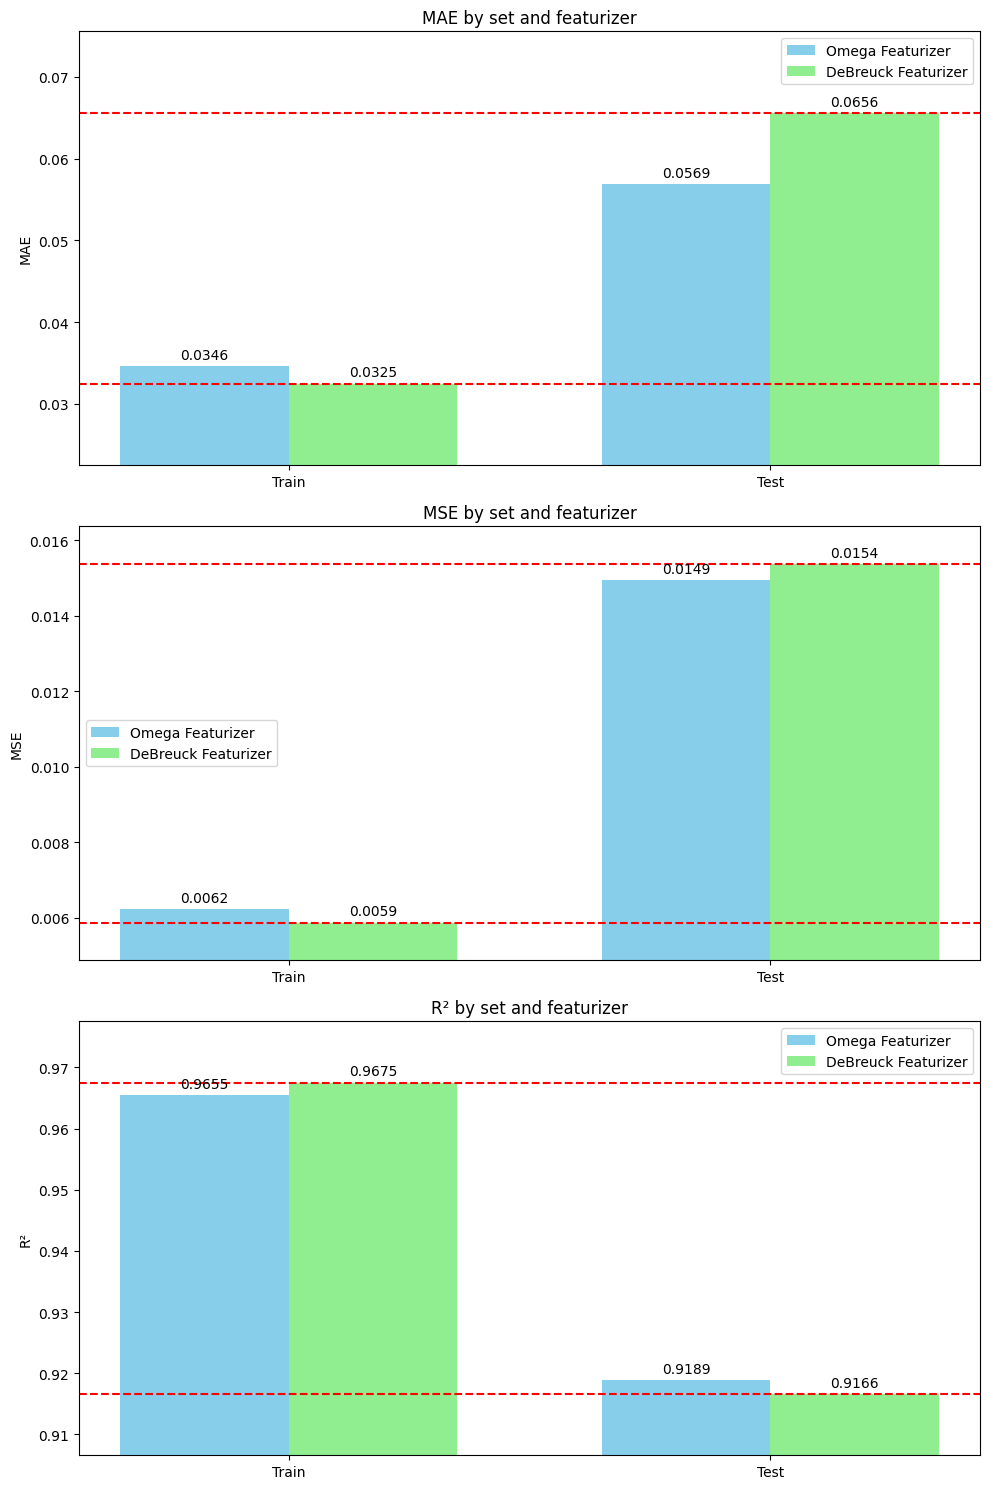

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Define the labels and results
labels = ['Train', 'Test']
mae_results = [mae_train, mae_test]
mae_results_simple = [mae_train_simple, mae_test_simple]
mse_results = [mse_train, mse_test]
mse_results_simple = [mse_train_simple, mse_test_simple]
r2_results = [r2_train, r2_test]
r2_results_simple = [r2_train_simple, r2_test_simple]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Function to add text on top of bars
def add_text(ax, rects):
     for rect in rects:
          height = rect.get_height()
          ax.annotate(f'{height:.4f}',
                         xy=(rect.get_x() + rect.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

# Plot MAE
rects1 = axs[0].bar(x - width/2, mae_results, width, label='Omega Featurizer', color='skyblue')
rects2 = axs[0].bar(x + width/2, mae_results_simple, width, label='DeBreuck Featurizer', color='lightgreen')
axs[0].axhline(y=mae_train_simple, color='r', linestyle='--')
axs[0].axhline(y=mae_test_simple, color='r', linestyle='--')
axs[0].set_ylabel('MAE')
axs[0].set_title('MAE by set and featurizer')
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels)
axs[0].legend()
add_text(axs[0], rects1)
add_text(axs[0], rects2)
# Adjust the range
axs[0].set_ylim([min(min(mae_results), min(mae_results_simple)) - 0.01, max(max(mae_results), max(mae_results_simple)) + 0.01])

# Plot MSE
rects1 = axs[1].bar(x - width/2, mse_results, width, label='Omega Featurizer', color='skyblue')
rects2 = axs[1].bar(x + width/2, mse_results_simple, width, label='DeBreuck Featurizer', color='lightgreen')
axs[1].axhline(y=mse_train_simple, color='r', linestyle='--')
axs[1].axhline(y=mse_test_simple, color='r', linestyle='--')
axs[1].set_ylabel('MSE')
axs[1].set_title('MSE by set and featurizer')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels)
axs[1].legend()
add_text(axs[1], rects1)
add_text(axs[1], rects2)
# Adjust the range
axs[1].set_ylim([min(min(mse_results), min(mse_results_simple)) - 0.001, max(max(mse_results), max(mse_results_simple)) + 0.001])

# Plot R²
rects1 = axs[2].bar(x - width/2, r2_results, width, label='Omega Featurizer', color='skyblue')
rects2 = axs[2].bar(x + width/2, r2_results_simple, width, label='DeBreuck Featurizer', color='lightgreen')
axs[2].axhline(y=r2_train_simple, color='r', linestyle='--')
axs[2].axhline(y=r2_test_simple, color='r', linestyle='--')
axs[2].set_ylabel('R²')
axs[2].set_title('R² by set and featurizer')
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels)
axs[2].legend()
add_text(axs[2], rects1)
add_text(axs[2], rects2)
# Adjust the range
axs[2].set_ylim([min(min(r2_results), min(r2_results_simple)) - 0.01, max(max(r2_results), max(r2_results_simple)) + 0.01])

fig.tight_layout()
plt.show()

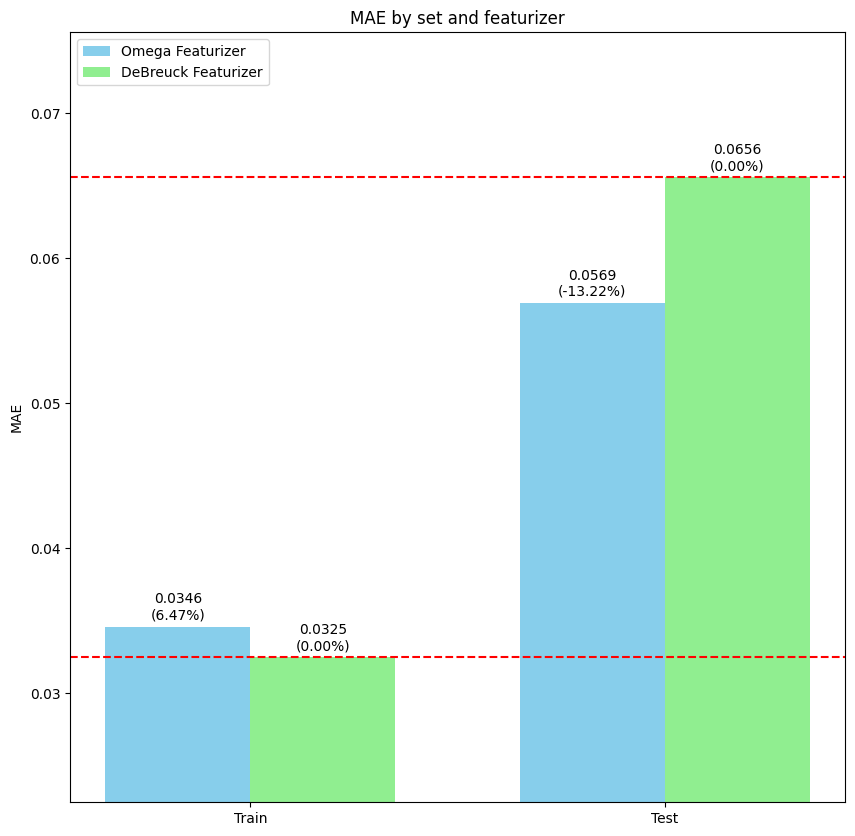

In [34]:
# Lets analyze the percent difference in the MAE between featurizers.
import numpy as np
import matplotlib.pyplot as plt

# Calculate the percentage difference in MAE between train and test data
mae_train_diff_percent = (mae_train - mae_train_simple) / mae_train_simple * 100
mae_test_diff_percent = (mae_test - mae_test_simple) / mae_test_simple * 100

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Function to add text on top of bars
def add_text(ax, rects, diffs):
     for rect, diff in zip(rects, diffs):
          height = rect.get_height()
          ax.annotate(f'{height:.4f}\n({diff:.2f}%)',
                         xy=(rect.get_x() + rect.get_width() / 2, height),
                         xytext=(0, 3),  # 3 points vertical offset
                         textcoords="offset points",
                         ha='center', va='bottom')

# Plot MAE
rects1 = ax.bar(x - width/2, mae_results, width, label='Omega Featurizer', color='skyblue')
rects2 = ax.bar(x + width/2, mae_results_simple, width, label='DeBreuck Featurizer', color='lightgreen')
ax.axhline(y=mae_train_simple, color='r', linestyle='--')
ax.axhline(y=mae_test_simple, color='r', linestyle='--')
ax.set_ylabel('MAE')
ax.set_title('MAE by set and featurizer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')
add_text(ax, rects1, [mae_train_diff_percent, mae_test_diff_percent])
add_text(ax, rects2, [0, 0])  # No difference for simple featurizer
# Adjust the range
ax.set_ylim([min(min(mae_results), min(mae_results_simple)) - 0.01, max(max(mae_results), max(mae_results_simple)) + 0.01])

plt.show()

##### The simpler featurizer, based solely on MatMiner features (DeBreuck2020), shows clear overfitting on the training data and a significant drop in accuracy on the test set when compared to the GNN-enhanced OMEGA featurizer. This trend was observed to become even more pronounced with larger datasets, where the chemical and physical features struggle to capture complex patterns as effectively as graph models do, impacting predictive performance of traditional feature-based models.